In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('C:/Users/CVR/Downloads/black-friday.csv')

In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df.fillna({'Product_Category_2': df['Product_Category_2'].mode()[0], 
           'Product_Category_3': df['Product_Category_3'].mode()[0]}, inplace=True)


In [7]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

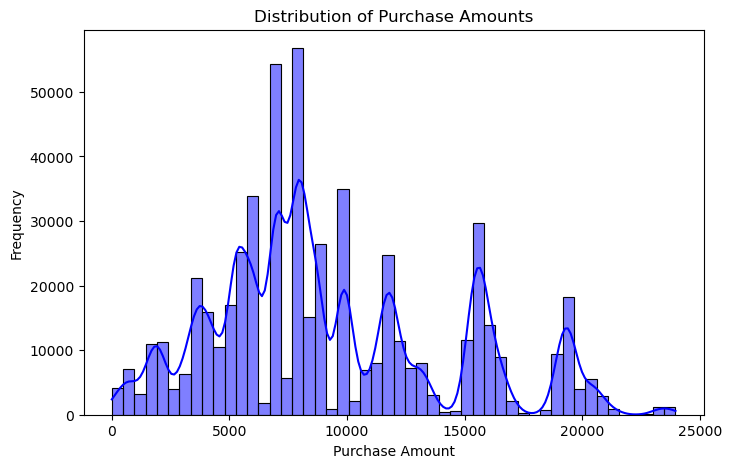

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchase'], bins=50, kde=True, color='blue')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


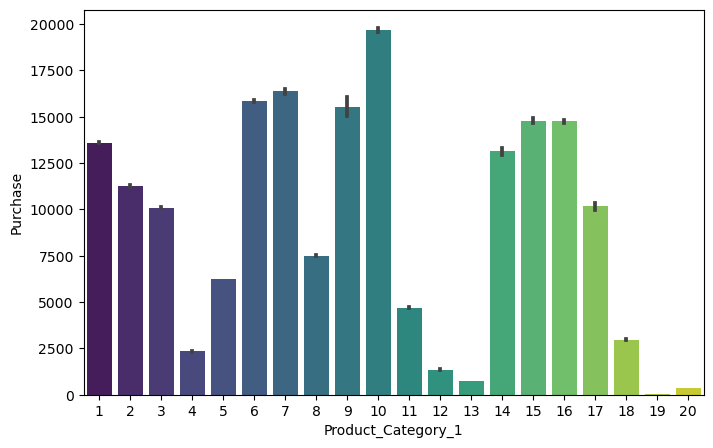

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Product_Category_1'], y=df['Purchase'], estimator=np.mean, palette='viridis')


plt.show()

In [10]:
# 6. Feature selection
X = df.drop(columns=['Purchase', 'User_ID', 'Product_ID'])

# 7. Select Target Variable
y = df['Purchase']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [13]:
# dt = DecisionTreeRegressor(random_state=42)
# dt.fit(X_train, y_train)
# y_pred_dt = dt.predict(X_test)

In [14]:
# rf = RandomForestRegressor(n_estimators=50, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
